<a href="https://colab.research.google.com/github/Beczheng/datasci_5_statistics/blob/main/HHA_507_HW_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing packages

In [39]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from statsmodels.formula.api import ols
import statsmodels.api as sm

# 2. Loading the dataset

In [40]:
# Loading the dataset

df = pd.read_csv('Insurance_Data.csv')
df

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


# 3. Cleaning the dataset

## Checking for missing values

In [41]:
# Checking for missing values

df.isna().value_counts()

index  PatientID  age    gender  bmi    bloodpressure  diabetic  children  smoker  region  claim
False  False      False  False   False  False          False     False     False   False   False    1332
                  True   False   False  False          False     False     False   False   False       5
                  False  False   False  False          False     False     False   True    False       3
dtype: int64

## Dropping missing values

In [42]:
# Dropping missing values in the dataset

df_drop_missing_values = df.dropna()
df_drop_missing_values

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
7,7,8,19.0,male,41.1,100,No,0,No,northwest,1146.80
8,8,9,20.0,male,43.0,86,No,0,No,northwest,1149.40
9,9,10,30.0,male,53.1,97,No,0,No,northwest,1163.46
...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


## Cleaning columns

In [43]:
# Cleaning columns in the dataset

def clean_column(df):
  def clean_name(name):
        cleaned_name = re.sub(r'[^a-zA-Z0-9]', '', name)
        return cleaned_name.lower()

  df.columns = [clean_name(col) for col in df.columns]
  return df

clean_df = clean_column(df_drop_missing_values)
clean_df

,index,patientid,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
7,7,8,19.0,male,41.1,100,No,0,No,northwest,1146.80
8,8,9,20.0,male,43.0,86,No,0,No,northwest,1149.40
9,9,10,30.0,male,53.1,97,No,0,No,northwest,1163.46
...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


## Renaming column names

In [44]:
# Renaming column names in the dataset

new_df = clean_df.rename(columns = {'patientid' : 'patient_id', 'bloodpressure' : 'blood_pressure'})
new_df

,index,patient_id,age,gender,bmi,blood_pressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
7,7,8,19.0,male,41.1,100,No,0,No,northwest,1146.80
8,8,9,20.0,male,43.0,86,No,0,No,northwest,1149.40
9,9,10,30.0,male,53.1,97,No,0,No,northwest,1163.46
...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


# 4. Conducting statistical tests

## Chi-Square test

In [45]:
# Calculating the value counts for the 'diabetic' column

new_df['diabetic'].value_counts()

No     695
Yes    637
Name: diabetic, dtype: int64

In [46]:
# Calculating the value counts for the 'smoker' column

new_df['smoker'].value_counts()

No     1058
Yes     274
Name: smoker, dtype: int64

In [47]:
# Creating a contingency table

contingency_table = pd.crosstab(new_df['diabetic'], new_df['smoker'])
print(contingency_table)

smoker     No  Yes
diabetic          
No        557  138
Yes       501  136


In [48]:
# Calculating the chi-square value and p-vlaue

chi2_value, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Chi-sqaure value: {chi2_value}")
print(f"P-value: {p_value}")

Chi-sqaure value: 0.36718563047941155
P-value: 0.544542351451581


## Chi-Square hypothesis testing


- **H0:** There is no association between diabetic and smoker.
- **H1:** There is no association between the diabetic and smoker.
- **Interpretation:** Accept the null hypothesis since the p-value is less greater than 0.05.



## T-test

In [49]:
# Splitting the data into two groups: diabetic and non-diabetic

diabetic = new_df[new_df['diabetic'] == 'Yes']['bmi']
non_diabetic = new_df[new_df['diabetic'] == 'No']['bmi']

print(diabetic)
print(non_diabetic)

0       23.2
10      19.8
11      20.3
18      35.4
19      33.3
        ... 
1325    36.4
1326    40.6
1329    37.7
1335    35.5
1337    34.5
Name: bmi, Length: 637, dtype: float64
1       30.1
7       41.1
8       43.0
9       53.1
12      20.7
        ... 
1333    36.4
1334    32.8
1336    38.1
1338    30.4
1339    47.4
Name: bmi, Length: 695, dtype: float64


In [50]:
# Calculating the t-statistic value and p-value

t_statistic, p_value = ttest_ind(diabetic, non_diabetic, equal_var=False)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: -1.3902641038113093
P-value: 0.16468320647316367


In [51]:
# Calculating the means

diabetic_mean = diabetic.mean()
non_diabetic_mean = non_diabetic.mean()

print(diabetic_mean)
print(non_diabetic_mean)

30.4149136577708
30.88143884892086


## T-test hypothesis testing

- **H0:** There is no difference in BMI between diabetic and non-diabetic.
- **H1:** There is a difference in BMI between diabetic and non-diabetic.
- **Interpretation:** Accept the null hypothesis since the p-value is greater than 0.05.

## Anova

In [52]:
# Creating a new table for the one-way Anova

anova_table_1 = new_df[['region', 'bmi']]
anova_table_1

,region,bmi
0,southeast,23.2
1,southeast,30.1
7,northwest,41.1
8,northwest,43.0
9,northwest,53.1
...,...,...
1335,northwest,35.5
1336,northeast,38.1
1337,northwest,34.5
1338,southeast,30.4


In [53]:
# Creating the linear regression model for the one-way ANOVA

model = ols('bmi ~ C(region)', data=anova_table_1).fit()
model

In [54]:
# Creating a one-way anova table

anova_1 = sm.stats.anova_lm(model, typ=2)
print(anova_1)

                 sum_sq      df          F        PR(>F)
C(region)   2444.296174     3.0  22.831671  2.054280e-14
Residual   47390.681326  1328.0        NaN           NaN


## Anova hypothesis testing

- **H0:** There is no difference in BMI among the different regions.
- **H1:** There is a difference in BMI among the different regions.
- **Interpretation:** Reject the null hypothesis since the p-value is less than 0.05.

## Regression

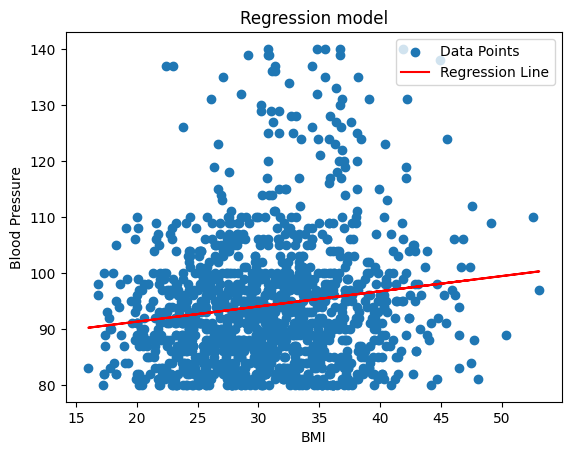

                            OLS Regression Results                            
Dep. Variable:         blood_pressure   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     28.55
Date:                Wed, 25 Oct 2023   Prob (F-statistic):           1.07e-07
Time:                        19:19:32   Log-Likelihood:                -5122.2
No. Observations:                1332   AIC:                         1.025e+04
Df Residuals:                    1330   BIC:                         1.026e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.8755      1.586     54.130      0.0

In [55]:
# Define the dependent and independent variables

X = new_df['bmi']
y = new_df['blood_pressure']

# Add a constant to the independent variable (required for the statsmodels regression model)

X = sm.add_constant(X)

# Fit the regression model

model = sm.OLS(y, X).fit()

# Print the summary of the regression

plt.scatter(new_df['bmi'], new_df['blood_pressure'], label='Data Points')
plt.plot(new_df['bmi'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('BMI')
plt.ylabel('Blood Pressure')
plt.title('Regression model')
plt.legend()
plt.show()

print(model.summary())

## Regression hypothesis testing

**Interpretation:** Since the R^2 value is closer to 0, this indicates that there is no linear correlation between BMI and blood pressure.